### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [1]:
#宣告
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import Sequential 
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.initializers import glorot_normal


Using TensorFlow backend.
/home/yanroo/anaconda3/envs/Keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yanroo/anaconda3/envs/Keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yanroo/anaconda3/envs/Keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yanroo/anaconda3/

--2020-02-14 17:43:53--  https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/data/dog.jpg [following]
--2020-02-14 17:43:54--  https://github.com/pjreddie/darknet/raw/master/data/dog.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg [following]
--2020-02-14 17:43:55--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163759 

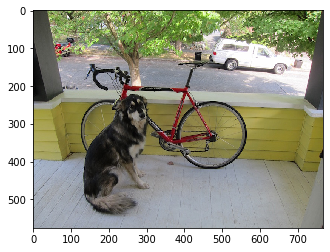

In [2]:
##讀入照片
# 下載圖片範例，如果已經下載過就可以註解掉
!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
image=cv2.imread('dog.jpg')
#ax.imshow(image)

def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(image)

### 1x1x3

In [3]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape,
         kernel_initializer=glorot_normal(seed=24)))
#作業: 接續搭建一個 4 個 3*3 的 filters 



print(model.summary())
#權重都是亂數值




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 576, 768, 3)       12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0)
print(image_batch.shape)

(1, 576, 768, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 3)


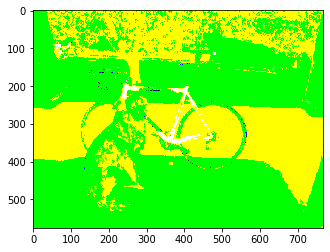

In [5]:
#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
img=np.squeeze(image_conv,axis=0)
print(img.shape)
plt.imshow(img)

#### 由於權重都是亂數值，所以每次跑出來的結果不同
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化

### 1x1x3 -> 3x3x4

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 576, 768, 4)       112       
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image Shape:  (576, 768, 4)


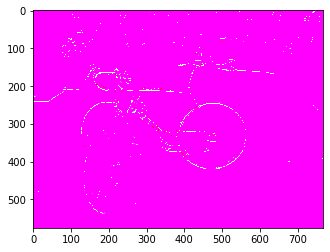

In [6]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3, (1,1), padding="same", data_format='channels_last', activation='relu', input_shape=image.shape, kernel_initializer=glorot_normal(seed=24)))

#作業: 接續搭建一個 4 個 3*3 的 filters 
model.add(Conv2D(4, (3,3), padding='same', activation='relu', kernel_initializer=glorot_normal(seed=24)))


print(model.summary())
print("")

# image_batch=np.expand_dims(image,axis=0)
# print("Image Batch Shape: ",image_batch.shape)

#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
img_1=np.squeeze(image_conv,axis=0)
print("Image Shape: ",img_1.shape)
plt.imshow(img_1)

### 3x3x4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 576, 768, 4)       112       
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
None

Image Shape:  (576, 768, 4)


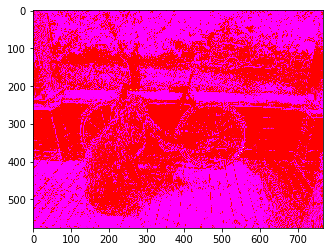

In [7]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model_2=Sequential()
model_2.add(Conv2D(4,(3,3), padding="same", data_format='channels_last', activation='relu', input_shape=image.shape, kernel_initializer=glorot_normal(seed=24)))


print(model_2.summary())
print("")

# image_batch=np.expand_dims(image,axis=0)
# print("Image Batch Shape: ",image_batch.shape)

#model.predict() 函式，得到回傳便是 feature map
image_conv=model_2.predict(image_batch)
img_2=np.squeeze(image_conv,axis=0)
print("Image Shape: ",img_2.shape)
plt.imshow(img_2)

###  ( 3x3x4 ) *4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 576, 768, 4)       112       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 576, 768, 4)       148       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 576, 768, 4)       148       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 576, 768, 4)       148       
Total params: 556
Trainable params: 556
Non-trainable params: 0
_________________________________________________________________
None



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image Shape:  (576, 768, 4)


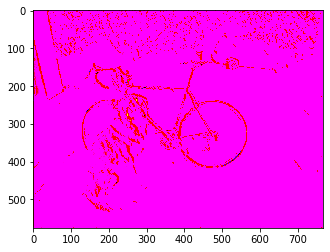

In [8]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model_3=Sequential()
model_3.add(Conv2D(4,(3,3), padding="same", data_format='channels_last', activation='relu', input_shape=image.shape, kernel_initializer=glorot_normal(seed=24)))
model_3.add(Conv2D(4,(3,3), padding="same", data_format='channels_last', activation='relu', kernel_initializer=glorot_normal(seed=24)))
model_3.add(Conv2D(4,(3,3), padding="same", data_format='channels_last', activation='relu', kernel_initializer=glorot_normal(seed=24)))
model_3.add(Conv2D(4,(3,3), padding="same", data_format='channels_last', activation='relu', kernel_initializer=glorot_normal(seed=24)))

print(model_3.summary())
print("")

# image_batch=np.expand_dims(image,axis=0)
# print("Image Batch Shape: ",image_batch.shape)

#model.predict() 函式，得到回傳便是 feature map
image_conv=model_3.predict(image_batch)
img_3=np.squeeze(image_conv,axis=0)
print("Image Shape: ",img_3.shape)
plt.imshow(img_3)

#### 1x1 Conv 與 3x3 Conv的結果感覺差異不大

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '3x3')

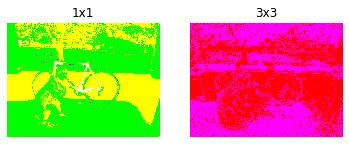

In [9]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title("1x1")
plt.subplot(1,2,2)
plt.imshow(img_2)
plt.axis('off')
plt.title("3x3")

#### 經過1x1 Conv 後 再用 3x3 Conv 可以有效截取邊緣特徵
#### 與多層3x3 Conv(深層)效果類似

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '3x3xN')

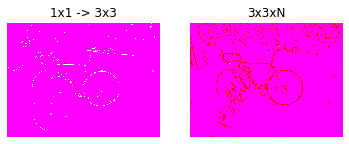

In [10]:
plt.subplot(1,2,1)
plt.imshow(img_1)
plt.axis('off')
plt.title("1x1 -> 3x3")
plt.subplot(1,2,2)
plt.imshow(img_3)
plt.axis('off')
plt.title("3x3xN")